<a href="https://colab.research.google.com/github/Hwarriach/Ensemble_Project/blob/main/Ensemble_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

%matplotlib inline

# EDA

In [151]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ensembles/talking_data.csv')
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [152]:
df.shape

(100000, 8)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [154]:
#Identifing missing Values
miss_val = df.isna().sum()
miss_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [155]:
# Dropping "attributed_time" column as 99% of the values are missing.

df1 = df.drop(['attributed_time'], axis=1)

In [156]:
print(df1.info())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ip             100000 non-null  int64 
 1   app            100000 non-null  int64 
 2   device         100000 non-null  int64 
 3   os             100000 non-null  int64 
 4   channel        100000 non-null  int64 
 5   click_time     100000 non-null  object
 6   is_attributed  100000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 5.3+ MB
None
                  ip           app         device             os  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean    91255.879670      12.04788      21.771250      22.818280   
std     69835.553661      14.94150     259.667767      55.943136   
min         9.000000       1.00000       0.000000       0.000000   
25%     40552.000000       3.00000       1.000000      13.000000   
50%     79827.000000      12.000

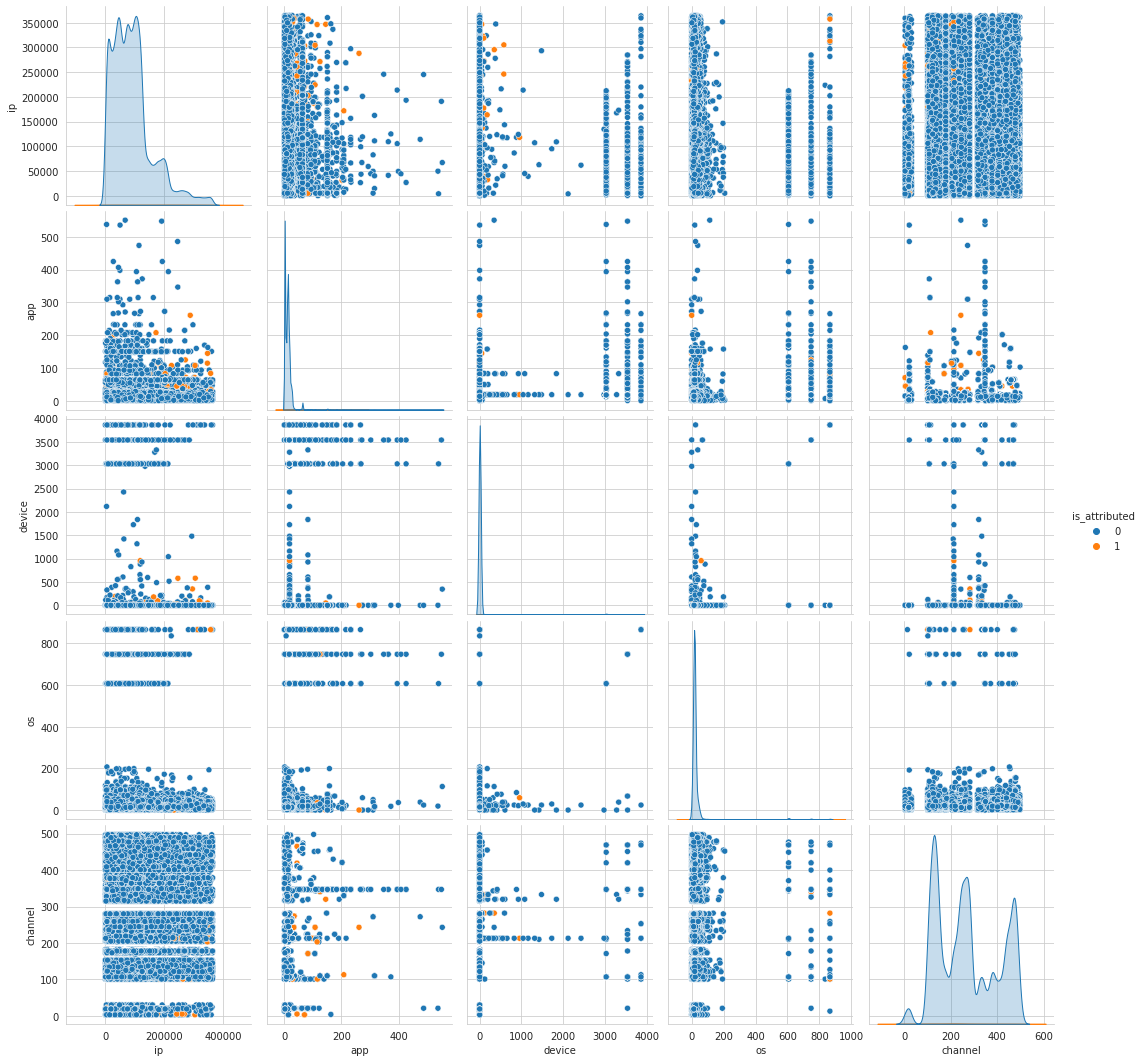

In [157]:
sns.set_style("whitegrid");
sns.pairplot(df1, hue="is_attributed", size=3);
plt.show()

In [158]:
corr = df1.corr()
corr

,ip,app,device,os,channel,is_attributed
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000


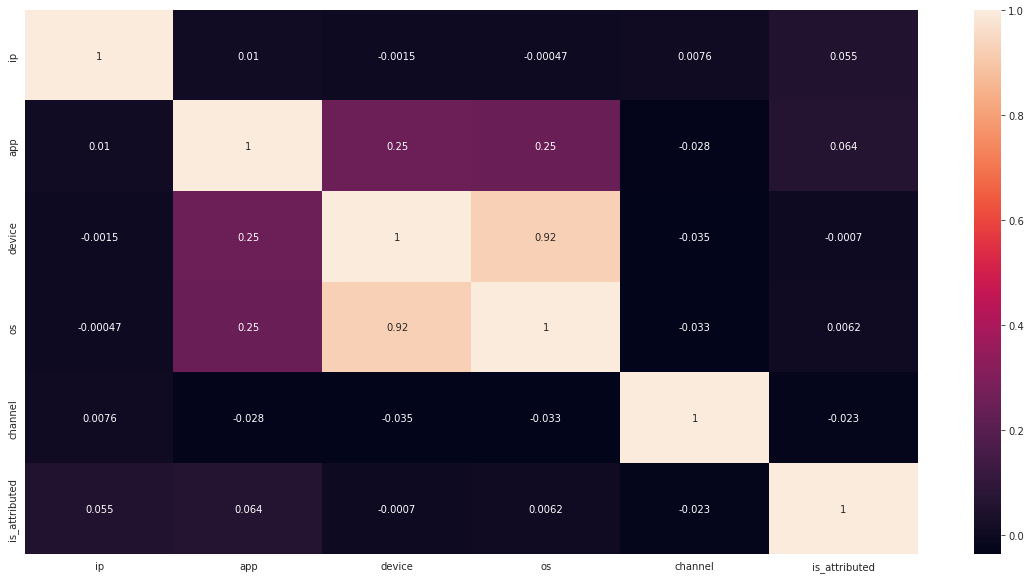

In [159]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [160]:
counts = df.nunique()
counts

ip                 34857
app                  161
device               100
os                   130
channel              161
click_time         80350
attributed_time      227
is_attributed          2
dtype: int64

'click_time' has the most unique values, followed up 'ip'. 

Transformation of Data types

In [161]:
df1.dtypes

ip                int64
app               int64
device            int64
os                int64
channel           int64
click_time       object
is_attributed     int64
dtype: object

In [162]:
df1.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


In [163]:
df1['click_time'] = pd.to_datetime(df1['click_time'])

In [164]:
# Extract year, month, date, day of week, hour and drop prior columns

df1['year'] = df1['click_time'].dt.year
df1['month'] = df1['click_time'].dt.month
df1['date_year'] = df1['click_time'].dt.day
df1['day_week'] = df1['click_time'].dt.dayofweek
df1['hour'] = df1["click_time"].dt.hour

df1.drop(columns=['click_time', 'year'], axis=1, inplace=True)

df1.head()

,ip,app,device,os,channel,is_attributed,month,date_year,day_week,hour
0,87540,12,1,13,497,0,11,7,1,9
1,105560,25,1,17,259,0,11,7,1,13
2,101424,12,1,19,212,0,11,7,1,18
3,94584,13,1,13,477,0,11,7,1,4
4,68413,12,1,1,178,0,11,9,3,9


# Machine Learning

In [165]:
from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
from sklearn import metrics
from sklearn import preprocessing

X = df1.drop(['is_attributed'], axis=1)
y = df1['is_attributed']

X = preprocessing.scale(X)

In [166]:
y.value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

Data is currently inbalanced as there are only 227 outputs of "1"

SMOTE = Balancing data 

In [170]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [171]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=12)
X_train, y_train = smote.fit_resample(X_train,y_train)

In [172]:
y_train.value_counts()

0    79812
1    79812
Name: is_attributed, dtype: int64

In [173]:
print(y_train.mean())
print(y_test.mean())

0.5
0.00195


**XG Boost**

In [174]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)

In [183]:
clf_xgb.fit(X_train, y_train) 
test_pred = clf_xgb.predict(X_test)
clf_xgb_score=clf_xgb.score(X_test , y_test)
print("The XGBoost classifier model accuracy is {}".format(clf_xgb_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))
print(metrics.classification_report(y_test,test_pred))

The XGBoost classifier model accuracy is 0.9815
The confusion matrix of Gradient Boost classifier model is
[[19594   367]
 [    3    36]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19961
           1       0.09      0.92      0.16        39

    accuracy                           0.98     20000
   macro avg       0.54      0.95      0.58     20000
weighted avg       1.00      0.98      0.99     20000



In [187]:
# AUC Score
metrics.roc_auc_score(y_test, test_pred)

0.9523455353323597

In [196]:
X_train

array([[-2.42454788e-01, -3.20451358e-03, -7.99920378e-02, ...,
        -9.68736018e-01, -9.68736018e-01, -1.02395175e+00],
       [ 3.48894523e-01, -6.05556690e-01, -7.99920378e-02, ...,
        -9.68736018e-01, -9.68736018e-01,  2.70430412e-01],
       [ 1.03387974e-01,  1.97579545e-01, -7.99920378e-02, ...,
         1.55792130e-01,  1.55792130e-01,  1.08632641e-01],
       ...,
       [ 2.55472687e+00,  1.31745251e+00, -7.99920378e-02, ...,
         1.55792130e-01,  1.55792130e-01, -6.72822004e-02],
       [ 1.95247091e+00,  6.48618624e+00, -7.50921360e-02, ...,
         1.84991769e-01,  1.84991769e-01,  7.51622462e-01],
       [ 2.51507578e+00,  4.65291624e-01,  9.71086399e-02, ...,
         1.55792130e-01,  1.55792130e-01,  6.20066415e-01]])

In [198]:
X

array([[-0.05320926, -0.00320451, -0.07999204, ..., -0.96873602,
        -0.96873602, -0.05316513],
       [ 0.20482678,  0.86685974, -0.07999204, ..., -0.96873602,
        -0.96873602,  0.59402595],
       [ 0.14560164, -0.00320451, -0.07999204, ..., -0.96873602,
        -0.96873602,  1.40301481],
       ...,
       [-1.03696811, -0.60555669, -0.07999204, ...,  0.15579213,
         0.15579213,  0.27043041],
       [ 0.3296349 ,  0.19757955, -0.07999204, ...,  0.15579213,
         0.15579213,  1.24121703],
       [ 0.40227734,  0.13065153, -0.07999204, ..., -0.96873602,
        -0.96873602,  0.75582372]])

In [199]:
# RFE

from sklearn.feature_selection import RFE
rfe = RFE(estimator=clf_xgb, n_features_to_select=5)
rfe.fit(X,y)

for i, col in zip(range(X.shape[1]), df1.columns):
  print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

ip selected=True rank=1
app selected=True rank=1
device selected=True rank=1
os selected=True rank=1
channel selected=True rank=1
is_attributed selected=False rank=5
month selected=False rank=3
date_year selected=False rank=4
day_week selected=False rank=2


**Bagging Classifier**

In [184]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred1 = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred1))
print(metrics.classification_report(y_test,test_pred1))

The Bagging classifier model accuracy is 0.9965
The confusion matrix of Bagging classifier model is
[[19909    52]
 [   18    21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19961
           1       0.29      0.54      0.38        39

    accuracy                           1.00     20000
   macro avg       0.64      0.77      0.69     20000
weighted avg       1.00      1.00      1.00     20000



In [188]:
# AUC Score
metrics.roc_auc_score(y_test, test_pred1)

0.7679282292778609

**Comparing the two models**

In [185]:
print("The XG Boost Classifier model recall is {}".format(metrics.recall_score(y_test,test_pred)))
print("The Bagging Classifier model recall is {}".format(metrics.recall_score(y_test,test_pred1)))

The XG Boost Classifier model accuracy is 0.9230769230769231
The Bagging Classifier model accuracy is 0.5384615384615384


The XGBoost model perform better in terms of Recall score and Auc score